In [7]:
# Summary of NEFSC Bottom Trawl Surveys (1963-2019)
## Code comes from NYB_ecosystem.R but I am playing with Jupyter by putting here the figures I am currently interested in.
## Using survdat data (from Kevin Friedland) to explore species distribution along Northeast US coast

ERROR: Error in parse(text = x, srcfile = src): <text>:2:6: unexpected symbol
1: # Summary of NEFSC Bottom Trawl Surveys (1963-2019)
2: Code comes
        ^


In [ ]:
library (tidyverse)
library(sp)
library (rnaturalearth)
library (rnaturalearthdata)
library(viridis)
library(gganimate)

load("/Users/janellemorano/DATA/Survdat_3_2020.RData")
dim(survdat)
#2892498      21
head(survdat)
# unique number of values for each column
sapply(survdat, function(x) length(unique(x)))

min(survdat$YEAR)
max(survdat$YEAR)

In [2]:
# Create basemap
world <- ne_countries(scale = "medium", returnclass = "sf")  

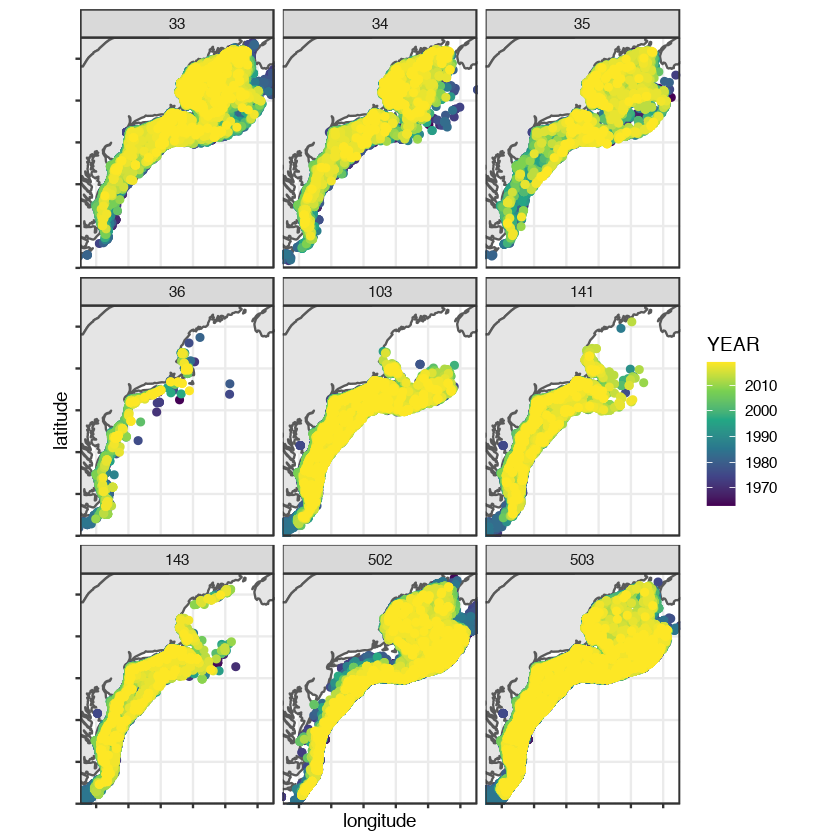

In [4]:
# Plot locations of collections of multiple species (SVSPP)
ggplot(data = world) +
  geom_sf() +
  coord_sf (xlim = c(-77,-65), ylim = c (34,45), expand = FALSE ) +
  geom_point(data = subset(survdat, SVSPP %in% c(33, 34, 35, 36, 103, 141, 143, 502, 503)),
             aes (x = LON, y = LAT, color = YEAR)) + #remove , size=BIOMASS for survey loc
  scale_color_continuous(type = "viridis") +
  scale_fill_viridis() +
  theme_bw() +
  theme (axis.text = element_blank()) +
  facet_wrap(~SVSPP) +
  xlab("longitude") + 
  ylab("latitude")

In [ ]:
Alewife

In [11]:
#create a subset df 
#33=alewife

survdat.alewife <- subset(survdat, SVSPP %in% c(33))
survdat.alewife$species <- c("alewife")

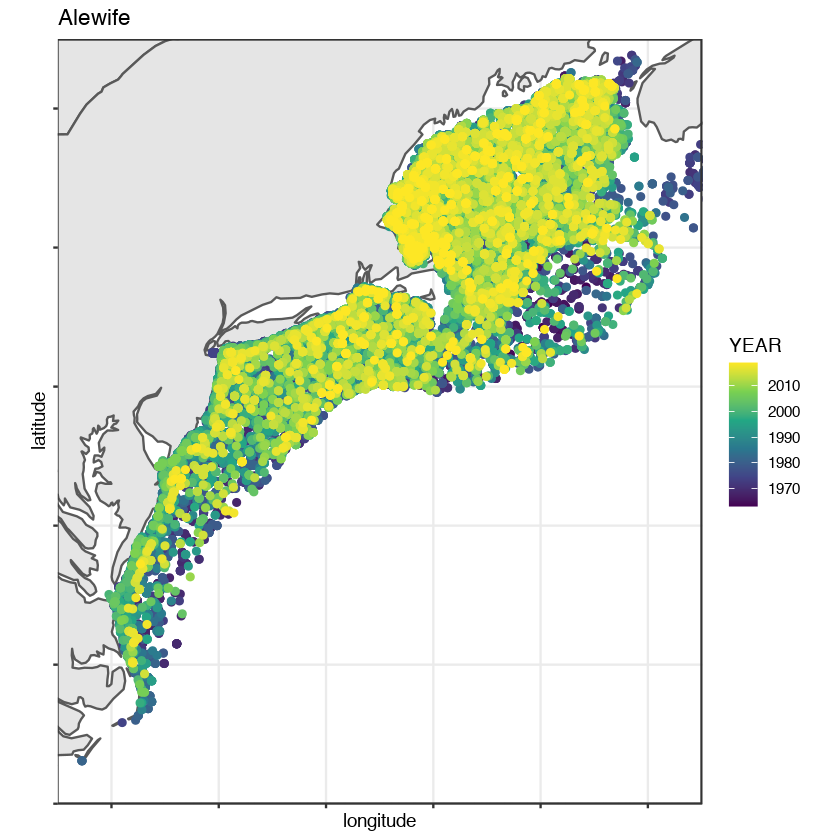

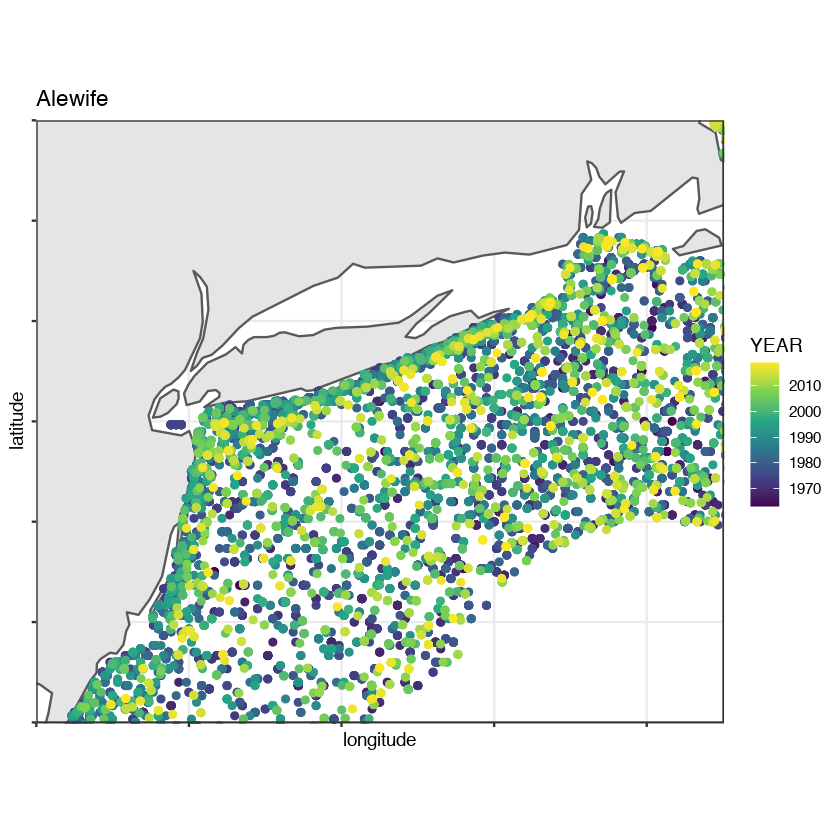

In [14]:
# Atlantic coast
ggplot(data = world) +
    geom_sf() +
    coord_sf (xlim = c(-77,-65), ylim = c (34,45), expand = FALSE ) +
    geom_point(data = survdat.alewife,
               aes (x = LON, y = LAT,
                    color = YEAR)) + 
    scale_color_continuous(type = "viridis") +
    scale_fill_viridis() +
    theme_bw() +
    theme (axis.text = element_blank()) +
    xlab("longitude") + 
    ylab("latitude") +
    ggtitle("Alewife")

#NY Bight region
ggplot(data = world) +
  geom_sf() +
  coord_sf (xlim = c(-75,-70.5), ylim = c (39,42), expand = FALSE ) +
  geom_point(data = survdat.alewife,
             aes (x = LON, y = LAT,
                  color = YEAR)) + 
  scale_color_continuous(type = "viridis") +
  scale_fill_viridis() +
  theme_bw() +
  theme (axis.text = element_blank()) +
  xlab("longitude") + 
  ylab("latitude") +
  ggtitle("Alewife")

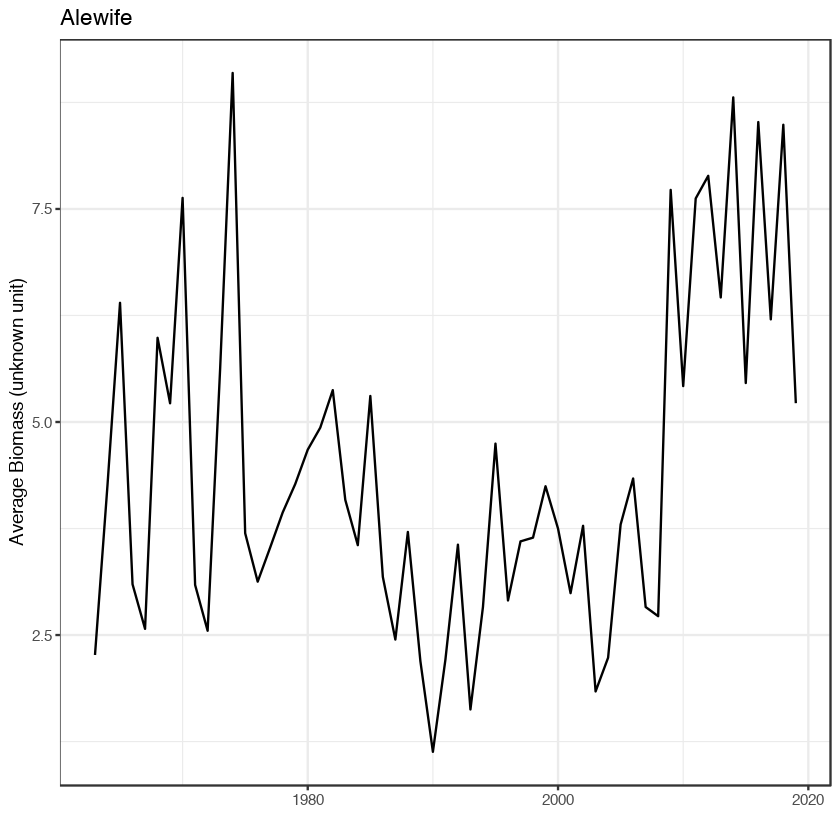

In [15]:
annual.bio <- survdat.alewife %>%
  group_by(YEAR) %>%
  summarise(avg = mean(BIOMASS))

ggplot(data = annual.bio, aes(YEAR, avg)) +
  geom_line() +
  theme_bw() +
  ggtitle("Alewife") +
  xlab("") + 
  ylab("Average Biomass (unknown unit)")

In [ ]:
# Shad

In [18]:
#create a subset df 
# 35=shad
survdat.shad <- subset(survdat, SVSPP %in% c(35))
survdat.shad$species <- c("shad")

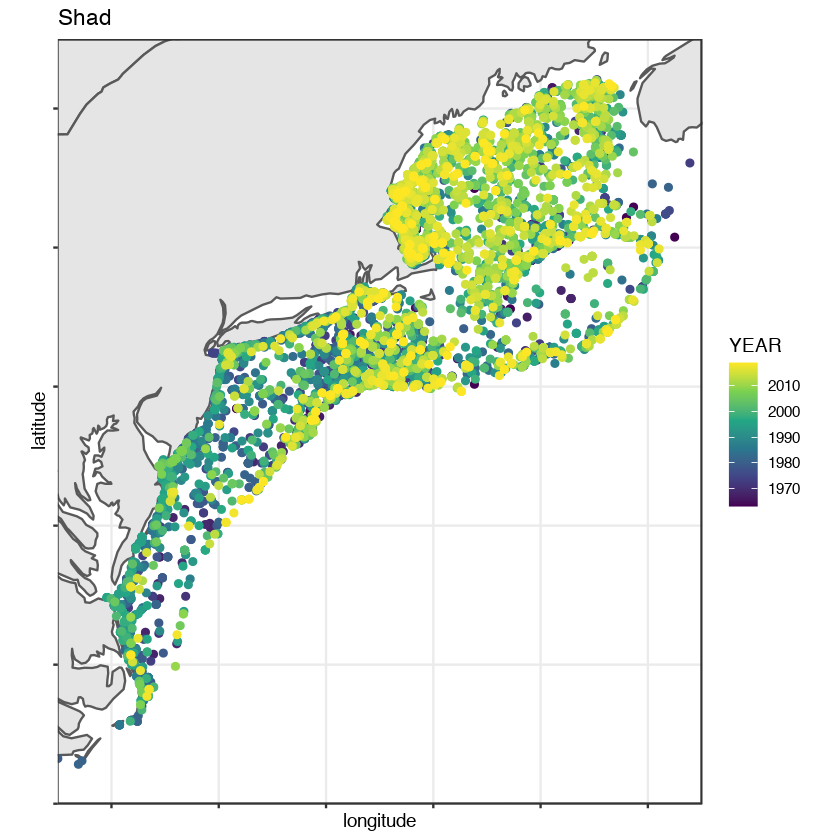

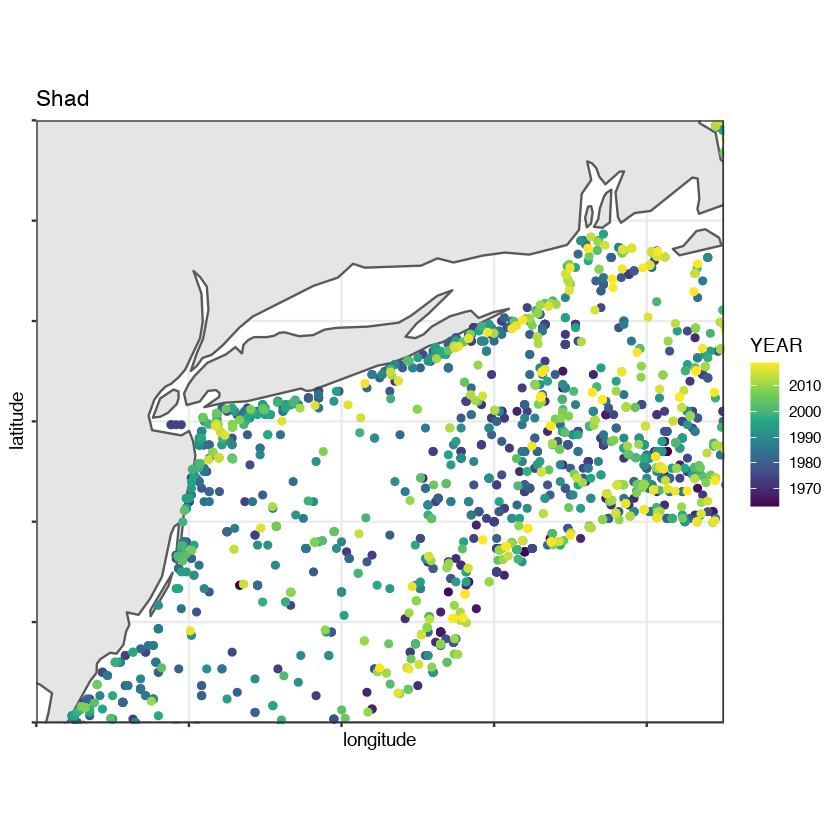

In [19]:
# Atlantic coast
ggplot(data = world) +
    geom_sf() +
    coord_sf (xlim = c(-77,-65), ylim = c (34,45), expand = FALSE ) +
    geom_point(data = survdat.shad,
               aes (x = LON, y = LAT,
                    color = YEAR)) + 
    scale_color_continuous(type = "viridis") +
    scale_fill_viridis() +
    theme_bw() +
    theme (axis.text = element_blank()) +
    xlab("longitude") + 
    ylab("latitude") +
    ggtitle("Shad")

#NY Bight region
ggplot(data = world) +
  geom_sf() +
  coord_sf (xlim = c(-75,-70.5), ylim = c (39,42), expand = FALSE ) +
  geom_point(data = survdat.shad,
             aes (x = LON, y = LAT,
                  color = YEAR)) + 
  scale_color_continuous(type = "viridis") +
  scale_fill_viridis() +
  theme_bw() +
  theme (axis.text = element_blank()) +
  xlab("longitude") + 
  ylab("latitude") +
  ggtitle("Shad")

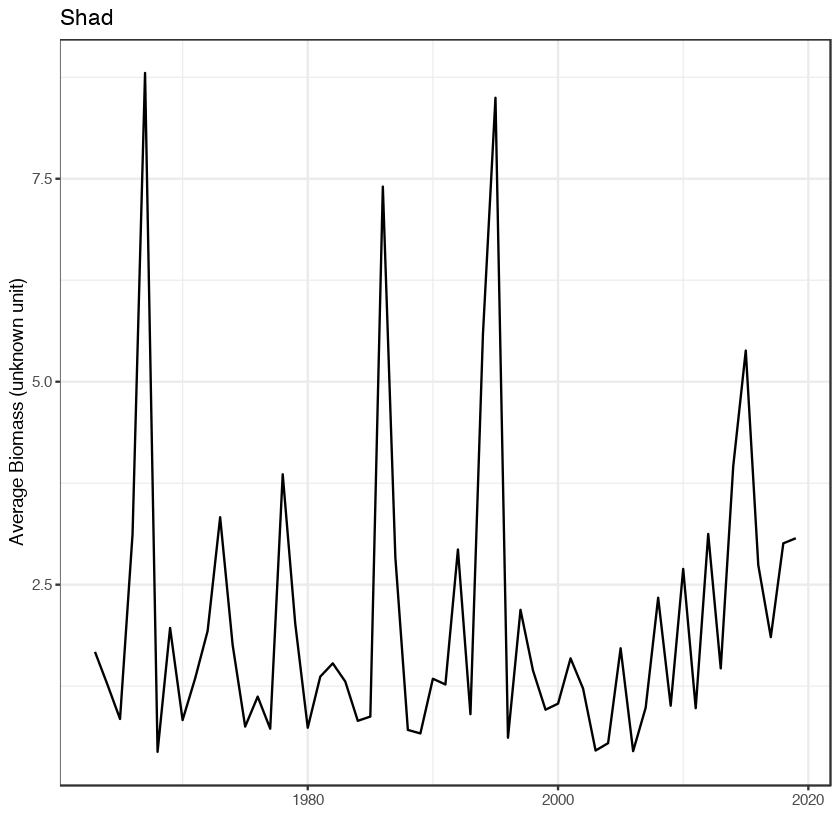

In [20]:
annual.bio <- survdat.shad %>%
  group_by(YEAR) %>%
  summarise(avg = mean(BIOMASS))

ggplot(data = annual.bio, aes(YEAR, avg)) +
  geom_line() +
  theme_bw() +
  ggtitle("Shad") +
  xlab("") + 
  ylab("Average Biomass (unknown unit)")